**Hand Gesture Detection assignment**



   Instruction/Hints are mentioned, to run the cell you have to do shift+enter



In [3]:
!pip install opendatasets
!pip install keras
!pip install tensorflow
!pip install rasa==1.1.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.2/447.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.2/516.2 kB 27.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of rasa to determine which version is compatible with other requirements. This could take a while.
ERROR: Ignored the following versions that require a different python version: 1.10.10 Requires-Python >=3.6,<3.8; 1.10.11 Requires-Python >=3.6,<3.8; 1.10.12 Requires-Python >=3.6,<3.8; 1.10.13 Requires-Python >=3.6,<3.8; 1.10.14 Requires-Python >=3.6,<3.8; 1.10.15 Requires-Python >=3.6,<3.8; 1.10.16 Requires-Python >=3.6,<3.8; 1.10.17 Requires-Python >=3.6,<3.8; 

In [4]:
# Import all the necessary dependcies

import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

You will have to make an account on kaggle and will have to use that 'username' and key.

In [9]:
# Download the dataset from kaggle


import opendatasets as od
import pandas as pd
od.download("https://www.kaggle.com/datasets/koryakinp/fingers")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: omgupta2004
Your Kaggle Key: ··········


100%|██████████| 363M/363M [00:05<00:00, 68.5MB/s]


In [42]:
import os
import cv2
import numpy as np

# Path to the dataset directory
dataset_dir = '/content/fingers/test'

# Initialize lists to store images and labels
images = []
labels = []

# Iterate through each image file
for filename in os.listdir(dataset_dir):
    # Load the image using OpenCV
  img_path = os.path.join(dataset_dir, filename)
  img = cv2.imread(img_path)
    # Resize the image to a desired size (e.g., 64x64)
  resized_img = cv2.resize(img, (64, 64))

    # Append the image to the images list
  images.append(resized_img)

    # Get the label from the filename (the first character)
  label = int(filename[-6])
  labels.append(label)
    # Append the label to the labels list


# Convert the lists to NumPy arrays
x_train = np.array(images)
x_test = np.array(images)
y_train = np.array(labels)
y_test = np.array(labels)

In [43]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [44]:
from tensorflow.keras.utils import to_categorical


Y_train = to_categorical(y_train, num_classes=6)

Y_test = to_categorical(y_test, num_classes=6)

In [45]:
print ("Y_train shape: " + str(Y_train.shape))
print ("Y_test shape: " + str(Y_test.shape))

Y_train shape: (3600, 6)
Y_test shape: (3600, 6)


In [54]:
def convolutional_model(input_shape):
    # Input layer
    input_img = tf.keras.Input(shape=input_shape)

    # CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    conv1 = tf.keras.layers.Conv2D(8, (4, 4), strides=(1, 1), padding='SAME')(input_img)

    # Apply RELU to the previous layer
    relu1 = tf.keras.layers.Activation('relu')(conv1)

    # MAXPOOL: window 8x8, stride 8, padding 'SAME'
    maxpool1 = tf.keras.layers.MaxPooling2D((8, 8), strides=(8, 8), padding='SAME')(relu1)

    # CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    conv2 = tf.keras.layers.Conv2D(16, (2, 2), strides=(1, 1), padding='SAME')(maxpool1)

    # Apply RELU to the previous layer
    relu2 = tf.keras.layers.Activation('relu')(conv2)

    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    maxpool2 = tf.keras.layers.MaxPooling2D((4, 4), strides=(4, 4), padding='SAME')(relu2)

    # FLATTEN
    flatten = tf.keras.layers.Flatten()(maxpool2)

    # Dense layer with 6 neurons in the output layer. Softmax activation function.
    output_layer = tf.keras.layers.Dense(6, activation='softmax')(flatten)

    # Create and return the model
    model = tf.keras.Model(inputs=input_img, outputs=output_layer)

    return model

In [64]:
# COMPILE YOUR MODEL HERE

conv_model = convolutional_model((64, 64,3))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = 'categorical_crossentropy'  # Adjust based on your problem type (e.g., 'binary_crossentropy' for binary classification)
metrics = ['accuracy']

# Compile the model
conv_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Display the model summary
conv_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 8)         392       
                                                                 
 activation_12 (Activation)  (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 8, 8, 8)           0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 16)          528       
                                                                 
 activation_13 (Activation)  (None, 8, 8, 16)          0         
                                                           

In [65]:
num_train_samples = 1800
num_test_samples = 300


batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train[:num_train_samples], Y_train[:num_train_samples]))
train_dataset = train_dataset.batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test[:num_test_samples], Y_test[:num_test_samples]))
test_dataset = test_dataset.batch(batch_size)

In [66]:
# TWEAK THE NUMBER OF IMAGES TO GET BETTER RESULTS


history = conv_model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
57/57 [==============================] - 4s 50ms/step - loss: 22.8603 - accuracy: 0.1656 - val_loss: 5.2089 - val_accuracy: 0.2467
Epoch 2/10
57/57 [==============================] - 4s 75ms/step - loss: 3.6630 - accuracy: 0.3017 - val_loss: 2.6941 - val_accuracy: 0.3333
Epoch 3/10
57/57 [==============================] - 3s 48ms/step - loss: 2.0815 - accuracy: 0.4528 - val_loss: 1.8164 - val_accuracy: 0.4967
Epoch 4/10
57/57 [==============================] - 2s 44ms/step - loss: 1.4937 - accuracy: 0.5633 - val_loss: 1.3787 - val_accuracy: 0.6067
Epoch 5/10
57/57 [==============================] - 3s 53ms/step - loss: 1.1733 - accuracy: 0.6400 - val_loss: 1.1100 - val_accuracy: 0.6500
Epoch 6/10
57/57 [==============================] - 3s 47ms/step - loss: 0.9632 - accuracy: 0.7006 - val_loss: 0.9511 - val_accuracy: 0.6733
Epoch 7/10
57/57 [==============================] - 3s 53ms/step - loss: 0.8163 - accuracy: 0.7306 - val_loss: 0.8227 - val_accuracy: 0.7300
Epoch 8/10
5

PLOT YOUR RESULTS HERE


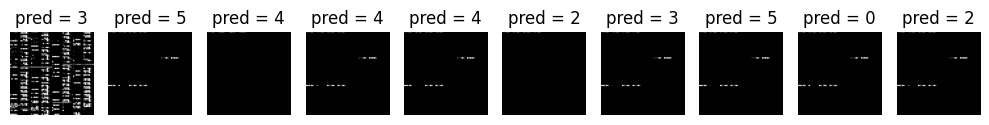

In [67]:
import random
import cv2
from matplotlib import pyplot as plt

numbers = list(range(1, 1001))
random_array = random.sample(numbers, 10)

fig = plt.figure(figsize=(10, 7))

for i, idx in enumerate(random_array):
    img_resized = cv2.resize(x_test[idx], (64, 64))
    y_pred = np.argmax(conv_model.predict(np.expand_dims(x_test[idx], axis=0),verbose=0))
    ax = fig.add_subplot(1, 10, i+1)
    ax.imshow(img_resized, cmap='gray')
    ax.axis('off')
    ax.set_title("pred = " + str(y_pred))

plt.tight_layout()
plt.show()